In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


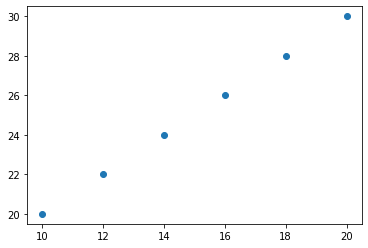

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([10,12,14,16,18,20])
y = np.array([20,22,24,26,28,30])

plt.scatter(X,y)

In [ ]:
#Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([10., 12., 14., 16., 18., 20.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([20., 22., 24., 26., 28., 30.], dtype=float32)>)

## Steps in modeling with Tensorflow

1 - Creating a model

*   Define the input and output layers

2 - Compiling a model

*   Loss function
*   Optimizer
*   Evaluation metrics

3- Fitting a model

*   Find patterns


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, # loss = mean(abs(y_true - y_pred), axis=-1)
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=7)

NameError: ignored

In [ ]:
y_pred = model.predict([12])
y_pred

## Improve Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100,verbose = 0)

In [ ]:
y_pred = model.predict([12])
y_pred

array([[19.650492]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)

])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              #optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100,verbose = 0)

In [ ]:
model.predict([12])


array([[21.91981]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)

])

model.compile(loss = tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 22.7294 - mae: 22.7294
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 20.9166 - mae: 20.9166
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 19.1237 - mae: 19.1237
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 17.3288 - mae: 17.3288
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 15.5110 - mae: 15.5110
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6543 - mae: 13.6543
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.7664 - mae: 11.7664
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 9.8297 - mae: 9.8297
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 7.8309 - mae: 7.8309
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 5.7616 - mae: 5.7616
Epoch 11/100
1/1 [==============================] - 0s 13

In [ ]:
model.predict([14])

array([[23.387346]], dtype=float32)

## Evaluating

In [ ]:
X = tf.range(-50,50,2)

In [ ]:
y = X +10 

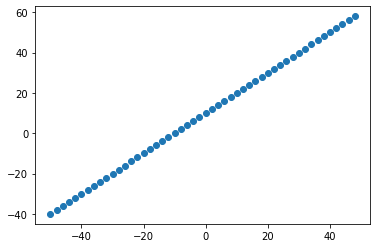

In [ ]:
import matplotlib.pyplot as plt
plt .scatter (X,y)

In [ ]:
len(X)

50

In [ ]:
#split the data into train and test sets
X_train = X[:40] 
X_test = X [40:]

y_train = y [:40]
y_test = y [40:]

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test),

(40, 10, 40, 10)

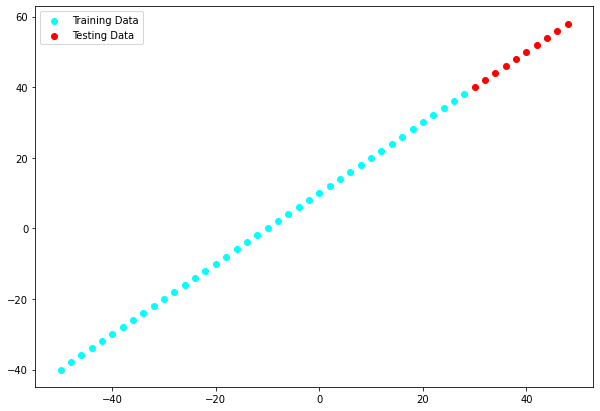

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="cyan", label = "Training Data")
plt.scatter(X_test,y_test,c="r", label = "Testing Data")
plt.legend()

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100))
#model.build()

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 21.0265 - mae: 21.0265
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 20.2754 - mae: 20.2754
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 19.5174 - mae: 19.5174
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 18.7921 - mae: 18.7921
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 18.0788 - mae: 18.0788
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 17.4140 - mae: 17.4140
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 16.7899 - mae: 16.7899
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 16.1395 - mae: 16.1395
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 15.3807 - mae: 15.3807
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 14.7269 - mae: 14.7269
Epoch 11/100
2/2 [==============================] 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


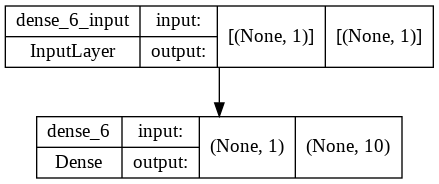

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)

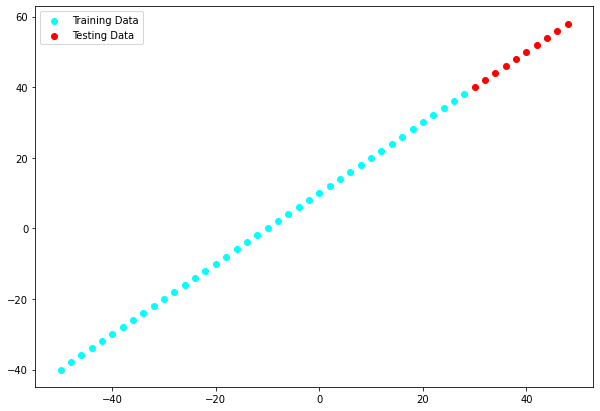

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="cyan", label= "Training Data")
plt.scatter(X_test, y_test, c="r", label="Testing Data")
#plt.scatter(X_test, y_pred, c="g", label = "Predictions")
plt.legend();

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-50, -48, -46, -44, -42, -40, -38, -36, -34, -32, -30, -28, -26,
        -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,
          2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28], dtype=int32)>, <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-40, -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16,
        -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,
         12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,
         38], dtype=int32)>)

## Build new models

 

1.  'model_1' - 1 layer, 100 epoch
2.  'model_2' - 2 layer, 100 epoch
3.  'model_3' - 2 layer, 500 epoch


In [ ]:
#Build model_1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 9.1149 - mae: 9.1149
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 7.7667 - mae: 7.7667
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6207 - mae: 8.6207
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8417 - mae: 7.8417
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6364 - mae: 7.6364
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6480 - mae: 7.6480
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0770 - mae: 8.0770
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 7.6970 - mae: 7.6970
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 8.3178 - mae: 8.3178
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 8.1751 - mae: 8.1751
Epoch 11/100
2/2 [==============================] - 0s 30ms/step - loss: 7.62

In [ ]:
y_preds_1 = model_1.predict(X_test)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds_1):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

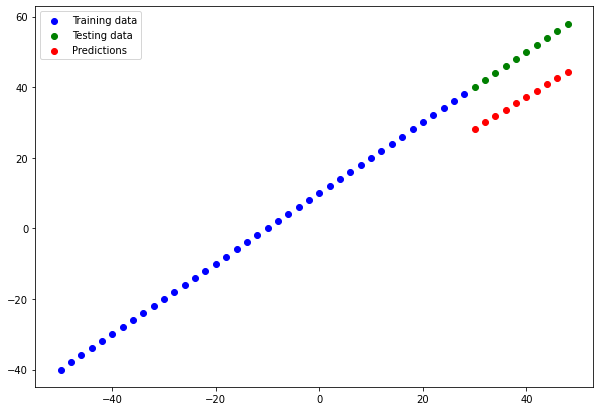

In [ ]:
plot_predictions()

In [ ]:
#build model_2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100,verbose = 0)


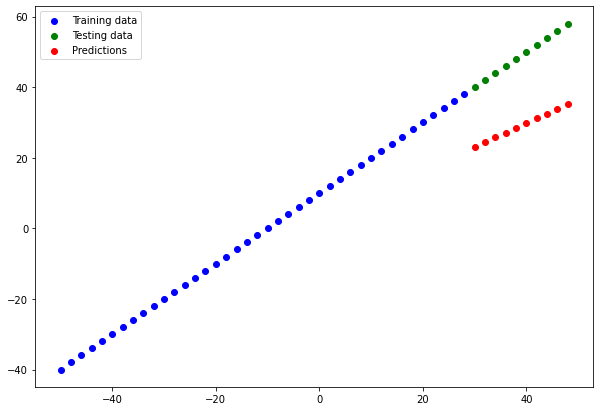

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#build model_3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500,verbose = 0)


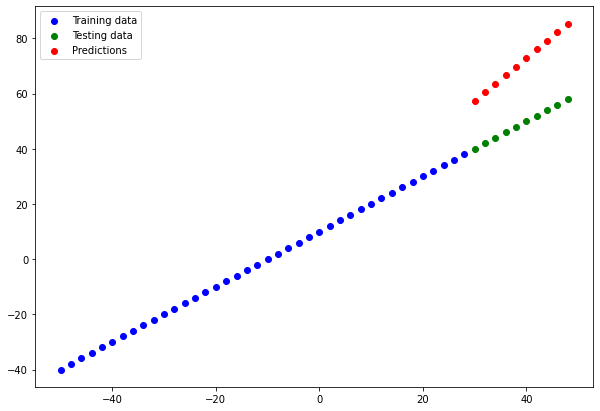

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

## Another Example 

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance_csv = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance_csv.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#one-hot encode our Dataframe so it's all numbers
insurance_csv_one_hot =pd.get_dummies(insurance_csv)
insurance_csv_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = insurance_csv_one_hot.drop("charges",axis=1)
y = insurance_csv_one_hot["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
len(X),len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
len(y),len(y_train), len(y_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(11)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 12571.1523 - mae: 12571.1523
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11739.2607 - mae: 11739.2607
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 10962.1592 - mae: 10962.1592
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 10732.0635 - mae: 10732.0635
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10065.7891 - mae: 10065.7891
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 10424.8359 - mae: 10424.8359
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 9573.1133 - mae: 9573.1133
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 10770.9473 - mae: 10770.9473
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 10013.5322 - mae: 10013.5322
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 9998.3379 

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8955.5996 - mae: 8955.5996


[8955.599609375, 8955.599609375]

In [ ]:
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])

logs =insurance_model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=70)

Text(0.5, 0, 'epochs')

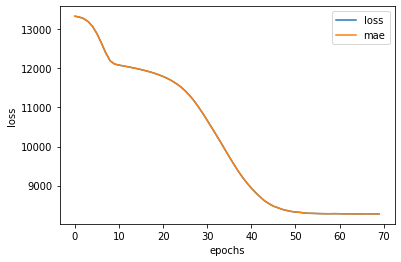

In [ ]:
pd.DataFrame(logs.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")